In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.utils import read_from_pickle
import jax.numpy as jnp
from ff_energy.ffe.plot import plot_energy_MSE, plot_ff_fit
from ff_energy.ffe.structure import atom_key_pairs
from ff_energy.ffe.potential import LJ, akp_indx
from ff_energy.ffe.ff import FF
from ff_energy.ffe.ff_fit import LJ_bound, load_ff, fit_func, fit_repeat
from ff_energy.ffe.data import pairs_data
from ff_energy.ffe.utils import pickle_output, read_from_pickle, str2int
from ff_energy.ffe.utils import pickle_output, PKL_PATH, read_from_pickle, str2int
from ff_energy.ffe.data import pairs_data, Data

In [2]:
# _c.data

In [3]:
sig_bound = (0.001, 2.5)
ep_bound = (0.001, 2.5)
chg_bound = (100,2000)

CHGPEN_bound = [(chg_bound),(chg_bound),(chg_bound),(chg_bound),(0,2000)]
LJ_bound = ((sig_bound), (sig_bound), (ep_bound), (ep_bound))
DE_bound = ((sig_bound), (sig_bound), (ep_bound), (ep_bound), 
            (1, 8), (6, 20))

In [4]:
#  example
# ffpkl = "ECOL_pbe0dz_FOE.ff.pkl"
ffpkl = "mdcm_pbe0dz_clusters.ff.pkl"

In [5]:
_c = next(read_from_pickle(f"ff/{ffpkl}"))
_c

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


FF: LJ water_cluster ELEC harmonic intE (jax_coloumb: True)

In [6]:
_c.intE = "ECOL"
_c.set_targets()


In [7]:
fit_repeat(_c, 
           1, 
           f"{ffpkl}_chgpen",
           bounds = CHGPEN_bound,
           loss="chgpen",
           # quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


Optimizing LJ parameters...
function: get_loss_chgpen
bounds: [(100, 2000), (100, 2000), (100, 2000), (100, 2000), (0, 2000)]
maxfev: 10000
initial guess: [1905.591952325662, 1219.6741257483159, 361.05953569949514, 1651.9044734626736, 883.0962591063065]
final_loss_fn:  134.0359344482422
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 134.0359344482422
             x: [ 1.896e+03  1.428e+03  4.251e+02  1.665e+03  2.510e+02]
           nit: 111
          nfev: 281
 final_simplex: (array([[ 1.896e+03,  1.428e+03, ...,  1.665e+03,
                         2.510e+02],
                       [ 1.896e+03,  1.428e+03, ...,  1.665e+03,
                         2.510e+02],
                       ...,
                       [ 1.896e+03,  1.428e+03, ...,  1.665e+03,
                         2.510e+02],
                       [ 1.896e+03,  1.428e+03, ...,  1.665e+03,
                         2.510e+02]]), array([ 1.340e+02,  1.340e+02,  1

In [8]:
resx = _c.opt_parm 
loss = _c.get_loss_chgpen(resx)
loss
resx

array([1895.86786969, 1428.05719301,  425.06729653, 1664.57393473,
        250.96024356])

In [9]:
np.sqrt(loss)

11.577389

In [10]:
# _c.eval_jax_chgpen(resx ) 

2.7070388182912596e-184


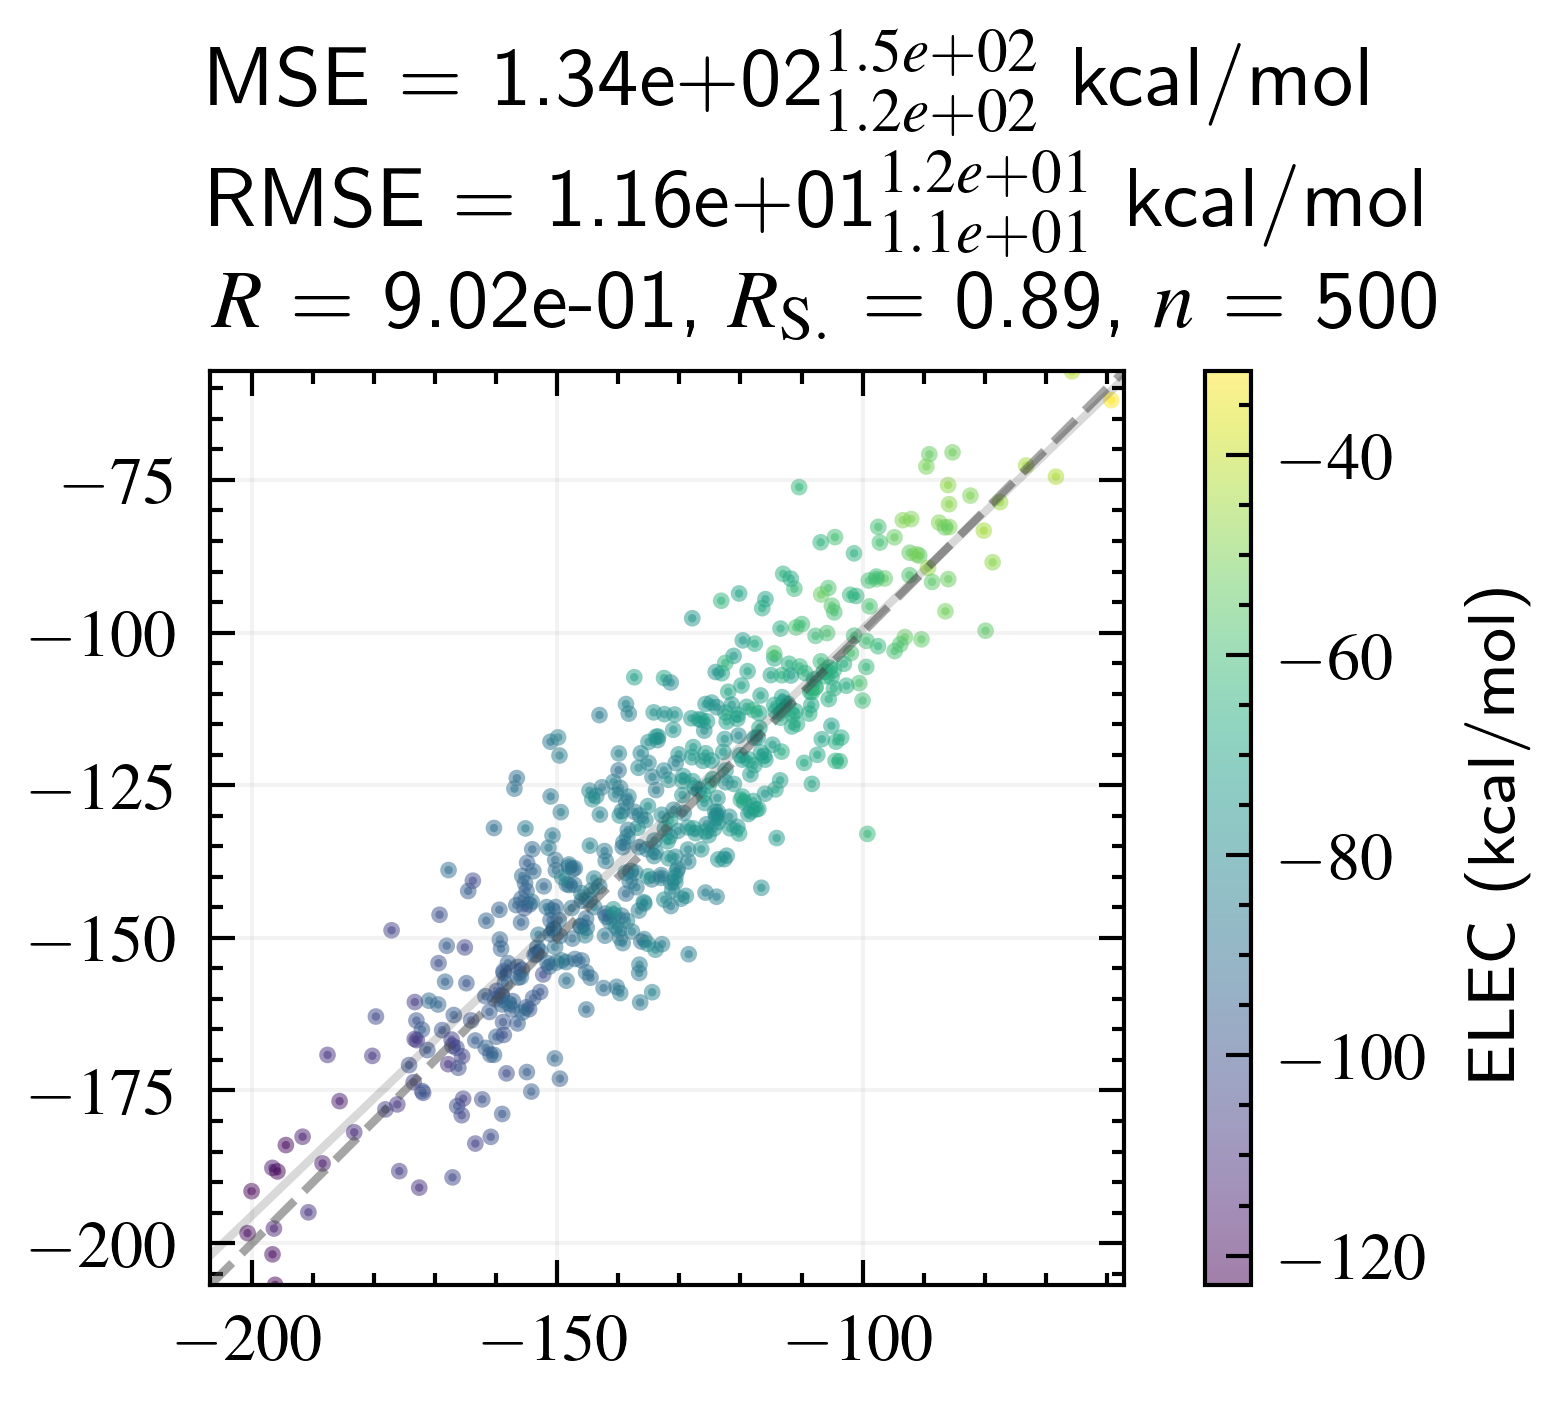

In [11]:
# _c.eval_jax_chgpen(resx ) 
_c.data["fit_ECOL"] = _c.eval_jax_chgpen(resx ) + _c.data.ELEC

plot_energy_MSE(_c.data, "ECOL", "fit_ECOL",  elec = "ELEC")

plt.savefig("mdcm_fit_ecol.pdf")

4.56111580439e-312


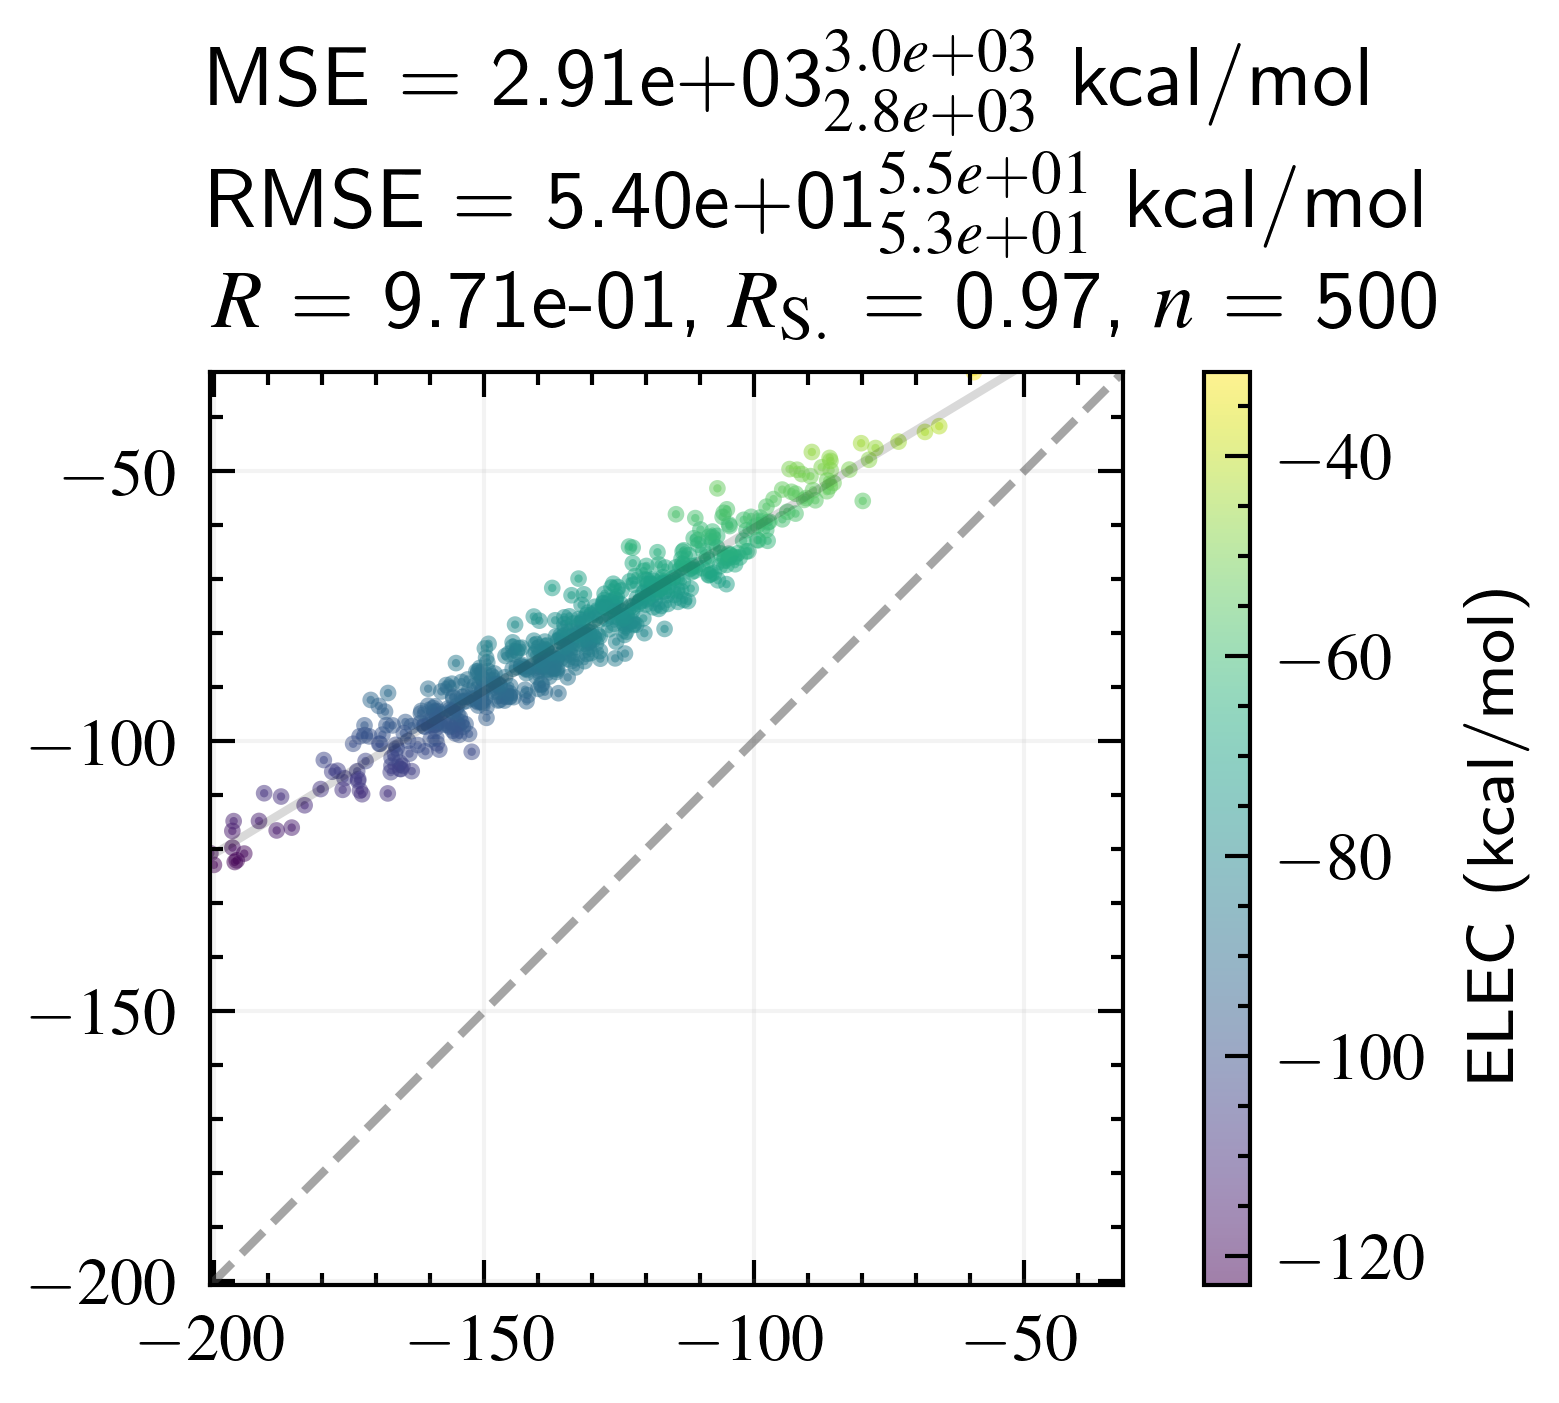

In [12]:
plot_energy_MSE(_c.data, "ECOL", "ELEC",  elec = "ELEC")
plt.savefig("mdcm_ecol.pdf")

In [13]:
_c.data["fit_ECOL"].mean()

-131.93028

In [14]:
pickle_output(_c, "ff/fit_ECOL_mdcm_intE")

#  LJ fit


In [44]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
LJFF = next(read_from_pickle(f"ff/fit_ECOL_mdcm_intE.pkl"))

In [45]:
LJFF.elec = "ELEC"
LJFF.intE = "intE"
LJFF.set_intE()
LJFF.set_targets()
print(LJFF.targets.mean())
LJFF

21.78233


FF: LJ water_cluster ELEC harmonic intE (jax_coloumb: True)

In [46]:
fit_repeat(LJFF, 
           15, 
           f"{ffpkl}_LJ",
           bounds = LJ_bound,
           loss="jax",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [47]:
pd.DataFrame(LJFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
15,16.270212,313,573,0,True,Optimization terminated successfully.,"[0.443630439727943, 1.7896706296669527, 0.0013...","([[0.443630439727943, 1.7896706296669527, 0.00..."
6,16.270472,250,449,0,True,Optimization terminated successfully.,"[0.47070886838044085, 1.7886531495733569, 0.00...","([[0.47070886838044085, 1.7886531495733569, 0...."
5,16.292295,356,635,0,True,Optimization terminated successfully.,"[0.017846274086957215, 1.835619146564112, 0.30...","([[0.017846274086957215, 1.835619146564112, 0...."
8,16.296318,348,627,0,True,Optimization terminated successfully.,"[0.001, 1.8324391097987958, 0.3106077110840053...","([[0.001, 1.8324391097987958, 0.31060771108400..."
10,16.640032,243,457,0,True,Optimization terminated successfully.,"[0.7113798096605528, 1.8042400021063856, 0.001...","([[0.7113798096605528, 1.8042400021063856, 0.0..."
2,16.857832,482,852,0,True,Optimization terminated successfully.,"[0.001, 1.9555420483311248, 2.5, 0.04209600062...","([[0.001, 1.9555420483311248, 2.5, 0.042096000..."
3,19.372559,468,848,0,True,Optimization terminated successfully.,"[0.26454754162143856, 2.3971515535082863, 0.05...","([[0.26454754162143856, 2.3971515535082863, 0...."
13,22.114840,814,1374,0,True,Optimization terminated successfully.,"[1.5745602439064392, 1.7561636764380044, 0.001...","([[1.5745602439064392, 1.7561636764380044, 0.0..."
7,22.114994,715,1229,0,True,Optimization terminated successfully.,"[1.5749529184642395, 1.7557467248498528, 0.001...","([[1.5749529184642395, 1.7557467248498528, 0.0..."
4,22.151163,662,1142,0,True,Optimization terminated successfully.,"[1.5534494909373109, 1.7552546380100862, 0.001...","([[1.5534494909373109, 1.7552546380100862, 0.0..."


In [48]:
bestres = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").x)[0]
bestres

array([4.43630440e-01, 1.78967063e+00, 1.36729252e-03, 1.40944051e-01])

In [49]:
abs(LJFF.eval_jax(bestres)).mean()

Array(21.77441, dtype=float32)

In [50]:
abs(LJFF.targets).mean()

Array(21.78233, dtype=float32)

In [51]:
best = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

4.033635106632963

1.2860390814289124e-276


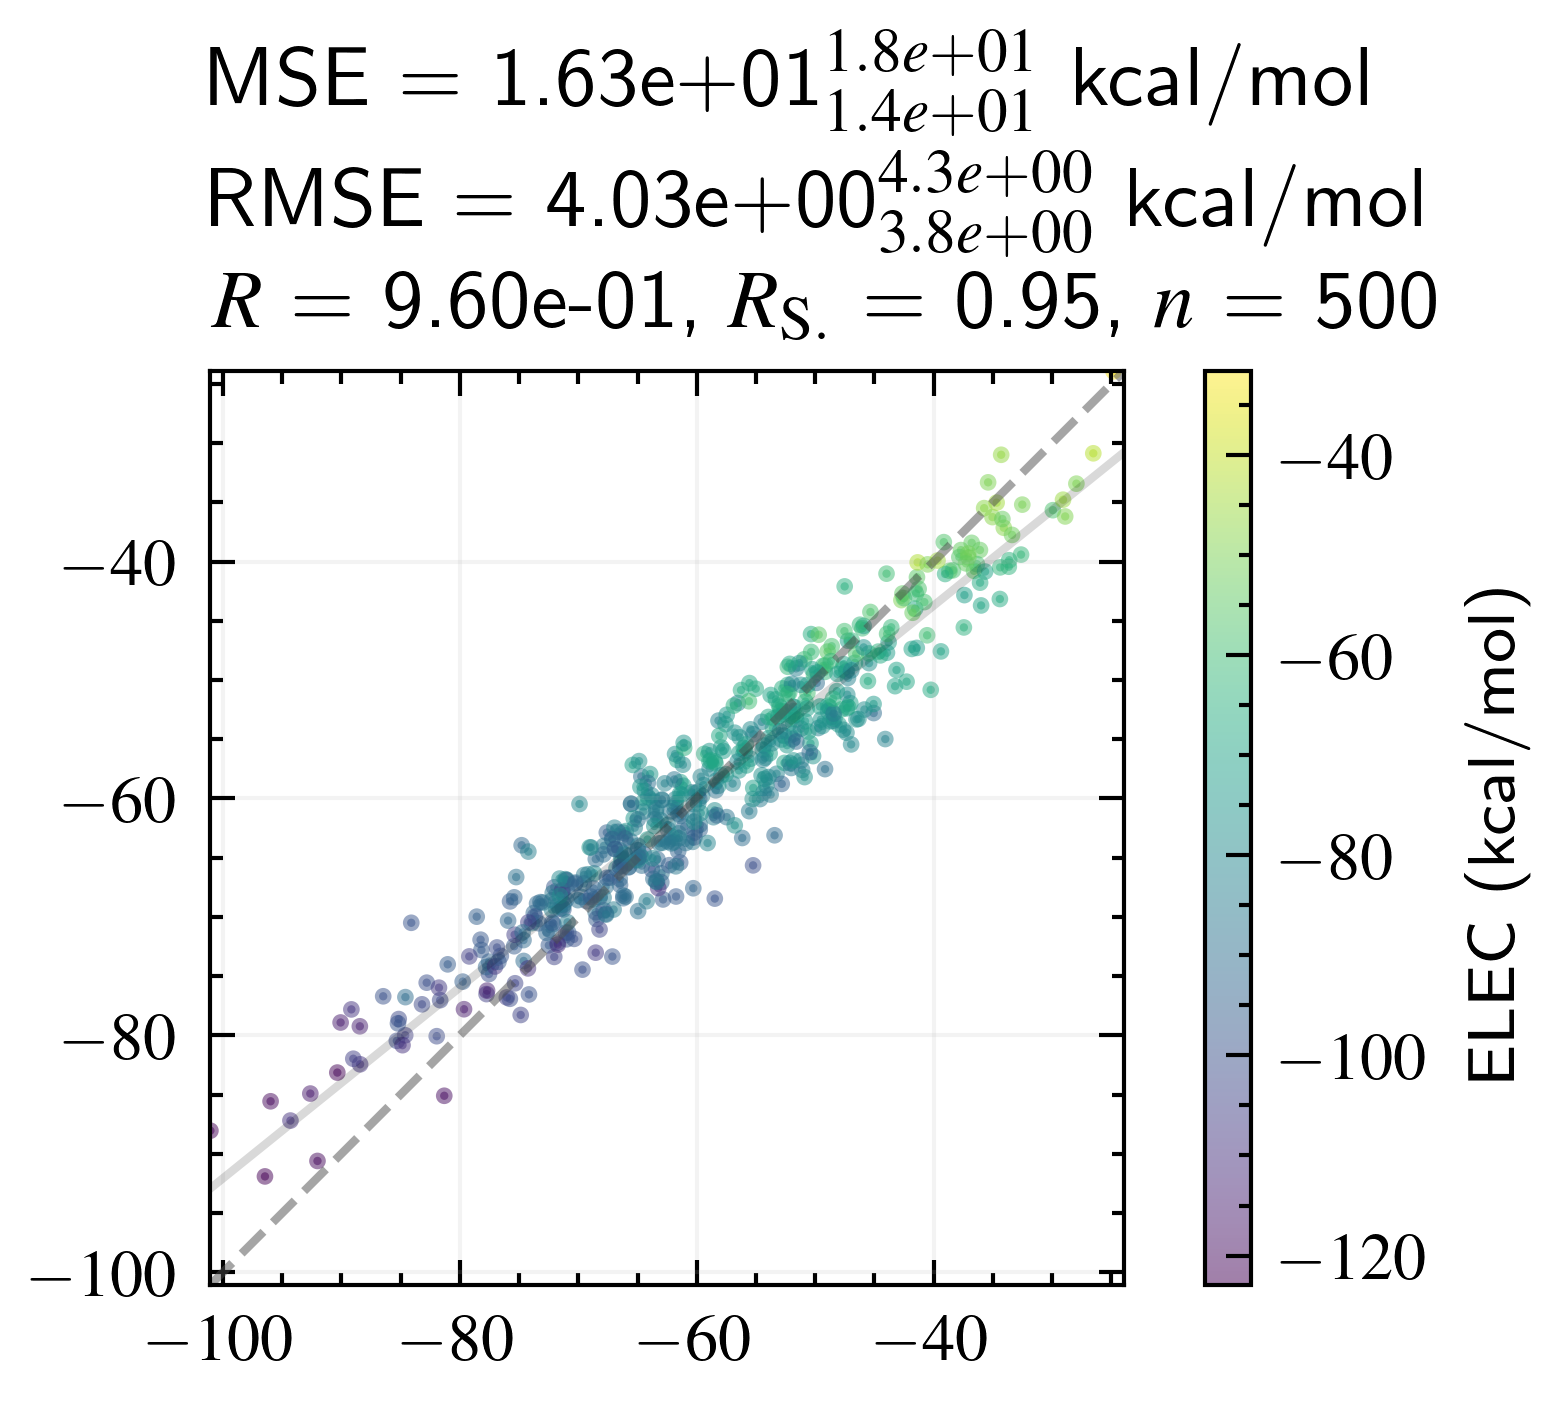

In [52]:
LJFF.data["fit_intE"] = LJFF.eval_jax(bestres) + LJFF.data.ELEC

plot_energy_MSE(LJFF.data, "intE", "fit_intE",  elec = "ELEC")
plt.savefig("mdcm_harmonic_lj_fit.pdf")


#  LJ fit exact


In [24]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
LJFF = next(read_from_pickle(f"ff/fit_ECOL_mdcm_intE.pkl"))
LJFF

FF: LJ water_cluster ELEC harmonic ECOL (jax_coloumb: True)

In [25]:
p = PKL_PATH / "water_cluster/pbe0dz/pbe0_dz.pc"
data_ = Data(p)

loading pickles from  /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.pc
Strcuture,PDB already already exists, loading structure from pickle


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:77: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


Fitting parameters: kb, ka, r0, a0


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:94: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  self.sum_monomer_df = self.get_loss_df(self.x).groupby(


In [26]:
data_.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,958349.117867,-958295.211613,-958345.566652
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,958347.989140,-958296.144723,-958359.139096
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,958356.057316,-958288.376060,-958359.343368
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,958353.297326,-958290.449867,-958324.530348
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,958360.820083,-958283.041923,-958345.890067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,958357.178250,-958287.528329,-958328.955198
test304,-123.903711,test304,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,958351.146070,-958293.116887,-958347.451339
test327,-195.846922,test327,19.73276,-103.42656,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,958349.201570,-958295.335953,-958385.682737
test185,-114.232038,test185,24.07288,-60.27765,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,958354.901870,-958289.053296,-958342.904458


In [27]:
data_.monomer_df

,M_ENERGY,KEY,n_monomers
test467,-1527.154217,test467,20
test263,-1527.156016,test263,20
test35,-1527.143158,test35,20
test223,-1527.147556,test223,20
test254,-1527.135568,test254,20
...,...,...,...
test100,-1527.141372,test100,20
test304,-1527.150985,test304,20
test327,-1527.154084,test327,20
test185,-1527.144999,test185,20


In [28]:
LJFF.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,...,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,DUMMY,k,epol_mike,first_order_energy,epol_pairs,fit_ECOL
test0,-173.022645,test0,24.14023,-109.15129,20.41138,test0,-1527.133263,test0,20,-1527.276175,...,-77.478222,958362.266640,-958281.958385,-958370.381547,0,0,-197.910658,7.640822,-182.982917,-166.760651
test1,-105.096240,test1,25.25058,-67.34370,8.97296,test1,-1527.135387,test1,20,-1527.221635,...,-53.285800,958360.933743,-958282.584949,-958336.157791,0,1,-113.959761,-5.902676,-111.406093,-107.321045
test2,-144.567121,test2,24.75756,-91.84521,14.41942,test2,-1527.140946,test2,20,-1527.260418,...,-70.885989,958357.445616,-958285.865741,-958360.493844,0,2,-160.484782,-6.037152,-153.110225,-156.526764
test3,-105.558619,test3,21.75948,-66.52134,5.74741,test3,-1527.151295,test3,20,-1527.247454,...,-58.662892,958350.951437,-958292.985598,-958352.359334,0,3,-118.662845,-4.570214,-111.548989,-110.896965
test4,-141.957058,test4,21.69034,-91.49016,12.55821,test4,-1527.150321,test4,20,-1527.270835,...,-73.371184,958351.562845,-958292.418135,-958367.030618,0,4,-155.773808,-12.251942,-151.839749,-146.543976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test495,-156.403481,test495,24.92171,-97.34343,17.54292,test495,-1527.129876,test495,20,-1527.255655,...,-72.611238,958364.391623,-958280.758013,-958357.505436,0,495,-175.806320,-1.718463,-166.329665,-154.763138
test496,-126.839243,test496,15.65968,-79.26338,12.74644,test496,-1527.168887,test496,20,-1527.264530,...,-61.118914,958339.912612,-958304.589688,-958363.074582,0,496,-138.410126,2.169631,-133.079412,-125.701454
test497,-160.377711,test497,20.65947,-93.41998,24.76786,test497,-1527.154064,test497,20,-1527.248923,...,-57.960443,958349.213649,-958294.973785,-958353.280867,0,497,-178.929213,31.250204,-170.886865,-169.159210
test498,-154.210967,test498,21.38907,-89.03952,20.35679,test498,-1527.150078,test498,20,-1527.257280,...,-65.470853,958351.715184,-958293.538913,-958358.525003,0,498,-171.903376,15.363398,-164.288222,-144.074554


In [29]:
LJFF.elec = "ELEC"
LJFF.intE = "intE"
LJFF.intern = "Exact"
LJFF.set_intE()
LJFF.set_targets()
print(LJFF.targets.mean())
LJFF

20.688993


FF: LJ water_cluster ELEC Exact intE (jax_coloumb: True)

In [37]:
fit_repeat(LJFF, 
           10, 
           f"{ffpkl}_LJ",
           bounds = LJ_bound,
           loss="jax",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [38]:
pd.DataFrame(LJFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
13,16.846302,247,473,0,True,Optimization terminated successfully.,"[0.3493490521072067, 1.7822989176895048, 0.006...","([[0.3493490521072067, 1.7822989176895048, 0.0..."
11,16.850677,316,573,0,True,Optimization terminated successfully.,"[0.19836529030288885, 1.7972034801741148, 0.04...","([[0.19836529030288885, 1.7972034801741148, 0...."
7,16.983746,244,444,0,True,Optimization terminated successfully.,"[0.001, 1.889343868230269, 1.4767473098139385,...","([[0.001, 1.889343868230269, 1.476747309813938..."
3,19.959028,425,751,0,True,Optimization terminated successfully.,"[0.10268818097739395, 2.3390701004055936, 0.29...","([[0.10268818097739395, 2.3390701004055936, 0...."
2,19.996346,320,583,0,True,Optimization terminated successfully.,"[0.001, 2.4348304403947685, 0.7815724071955781...","([[0.001, 2.4348304403947685, 0.78157240719557..."
4,22.166031,687,1172,0,True,Optimization terminated successfully.,"[1.5680676353787044, 1.750500482964791, 0.001,...","([[1.5680676353787044, 1.750500482964791, 0.00..."
8,23.557402,392,706,0,True,Optimization terminated successfully.,"[1.625342786064321, 1.184829730652147, 0.00100...","([[1.625342786064321, 1.184829730652147, 0.001..."
12,23.638100,328,581,0,True,Optimization terminated successfully.,"[1.627785094379145, 1.1721182617815864, 0.0010...","([[1.627785094379145, 1.1721182617815864, 0.00..."
0,134.035934,111,281,0,True,Optimization terminated successfully.,"[1895.8678696937782, 1428.0571930052483, 425.0...","([[1895.8678696937782, 1428.0571930052483, 425..."
1,491.181702,69,190,0,True,Optimization terminated successfully.,"[0.001, 0.06834054604641371, 0.595349405523542...","([[0.001, 0.06834054604641371, 0.5953494055235..."


In [39]:
bestres = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").x)[0]
bestres

array([0.34934905, 1.78229892, 0.00687381, 0.14919658])

In [40]:
abs(LJFF.eval_jax(bestres)).mean()

Array(20.698818, dtype=float32)

In [41]:
abs(LJFF.targets).mean()

Array(20.689198, dtype=float32)

In [42]:
best = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

4.104424689584486

5.892693573061841e-270


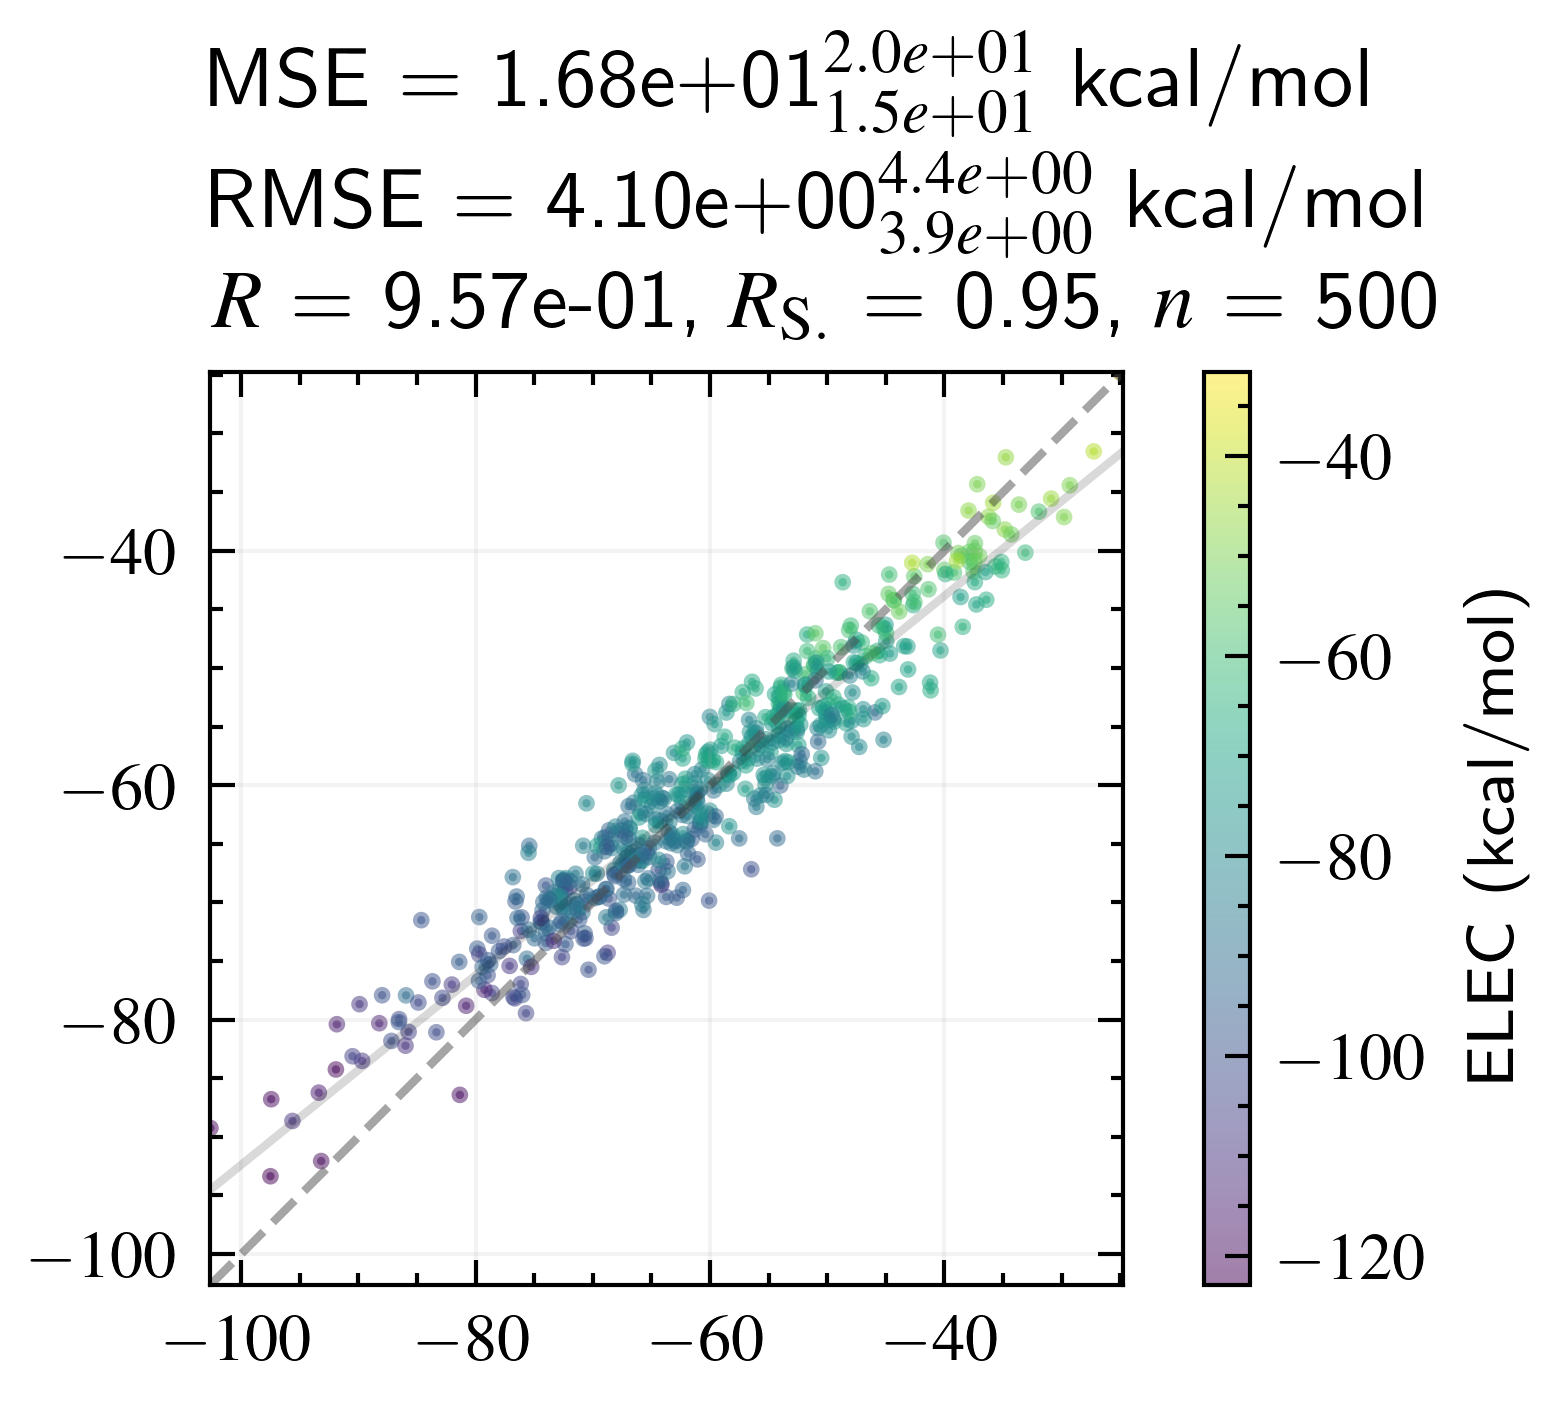

In [43]:
LJFF.data["fit_intE"] = LJFF.eval_jax(bestres) + LJFF.data.ELEC

plot_energy_MSE(LJFF.data, "intE", "fit_intE",  elec = "ELEC")
plt.savefig("mdcm_exact_lj_fit.pdf")


In [69]:
# LJFF.elec = "fit_ECOL"
# LJFF.intE = "intE"
# LJFF.set_intE()
# LJFF.set_targets()
# print(LJFF.targets.mean())
# LJFF

72.770775


FF: LJ water_cluster fit_ECOL harmonic intE (jax_coloumb: True)

#  LJ fit exact, ECOL


In [91]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
LJFF = next(read_from_pickle(f"ff/fit_ECOL_mdcm_intE.pkl"))
LJFF

FF: LJ water_cluster ELEC harmonic ECOL (jax_coloumb: True)

In [92]:
# p = PKL_PATH / "water_cluster/pbe0dz/pbe0_dz.pc"
# data_ = Data(p)

In [93]:
# data_.data

In [94]:
# data_.monomer_df

In [95]:
# LJFF.data

In [96]:
LJFF.elec = "ECOL"
LJFF.intE = "intE"
LJFF.intern = "Exact"
LJFF.set_intE()
LJFF.set_targets()
print(LJFF.targets.mean())
LJFF

73.60582


FF: LJ water_cluster ECOL Exact intE (jax_coloumb: True)

In [97]:
fit_repeat(LJFF, 
           10, 
           f"{ffpkl}_LJ",
           bounds = LJ_bound,
           loss="jax",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [98]:
pd.DataFrame(LJFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
7,21.204657,163,321,0,True,Optimization terminated successfully.,"[0.001, 2.5, 0.052442977704893985, 0.003771101...","([[0.001, 2.5, 0.052442977704893985, 0.0037711..."
4,21.260790,605,1060,0,True,Optimization terminated successfully.,"[0.001, 2.3104235567465556, 0.1024306623776748...","([[0.001, 2.3104235567465556, 0.10243066237767..."
8,21.832388,527,906,0,True,Optimization terminated successfully.,"[0.04807575809023806, 2.115189994996074, 0.001...","([[0.04807575809023806, 2.115189994996074, 0.0..."
9,21.859806,323,607,0,True,Optimization terminated successfully.,"[0.008884348351164662, 2.11077471676927, 0.001...","([[0.008884348351164662, 2.11077471676927, 0.0..."
0,134.035934,111,281,0,True,Optimization terminated successfully.,"[1895.8678696937782, 1428.0571930052483, 425.0...","([[1895.8678696937782, 1428.0571930052483, 425..."
1,5713.072266,19,33,0,True,Optimization terminated successfully.,"[0.001, 0.001, 2.5, 2.5]","([[0.001, 0.001, 2.5, 2.5], [0.001, 0.001, 2.5..."
2,5713.072266,33,134,0,True,Optimization terminated successfully.,"[0.016834891157025612, 0.001, 2.22797180421986...","([[0.016834891157025612, 0.001, 2.227971804219..."
3,5713.072266,51,162,0,True,Optimization terminated successfully.,"[0.04010428875422828, 0.05711073632754016, 2.3...","([[0.04010428875422828, 0.05711073632754016, 2..."
5,5713.072266,55,168,0,True,Optimization terminated successfully.,"[0.04888373381270443, 0.001, 2.492284599365157...","([[0.04888373381270443, 0.001, 2.4922845993651..."
6,5713.072266,60,179,0,True,Optimization terminated successfully.,"[0.04744973906828187, 0.04480420986732092, 1.5...","([[0.04744973906828187, 0.04480420986732092, 1..."


In [99]:
bestres = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").x)[0]
bestres

array([1.00000000e-03, 2.50000000e+00, 5.24429777e-02, 3.77110140e-03])

In [100]:
abs(LJFF.eval_jax(bestres)).mean()

Array(73.67436, dtype=float32)

In [101]:
abs(LJFF.targets).mean()

Array(73.60582, dtype=float32)

In [102]:
best = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

4.604851420073415

3.7472721982508165e-230


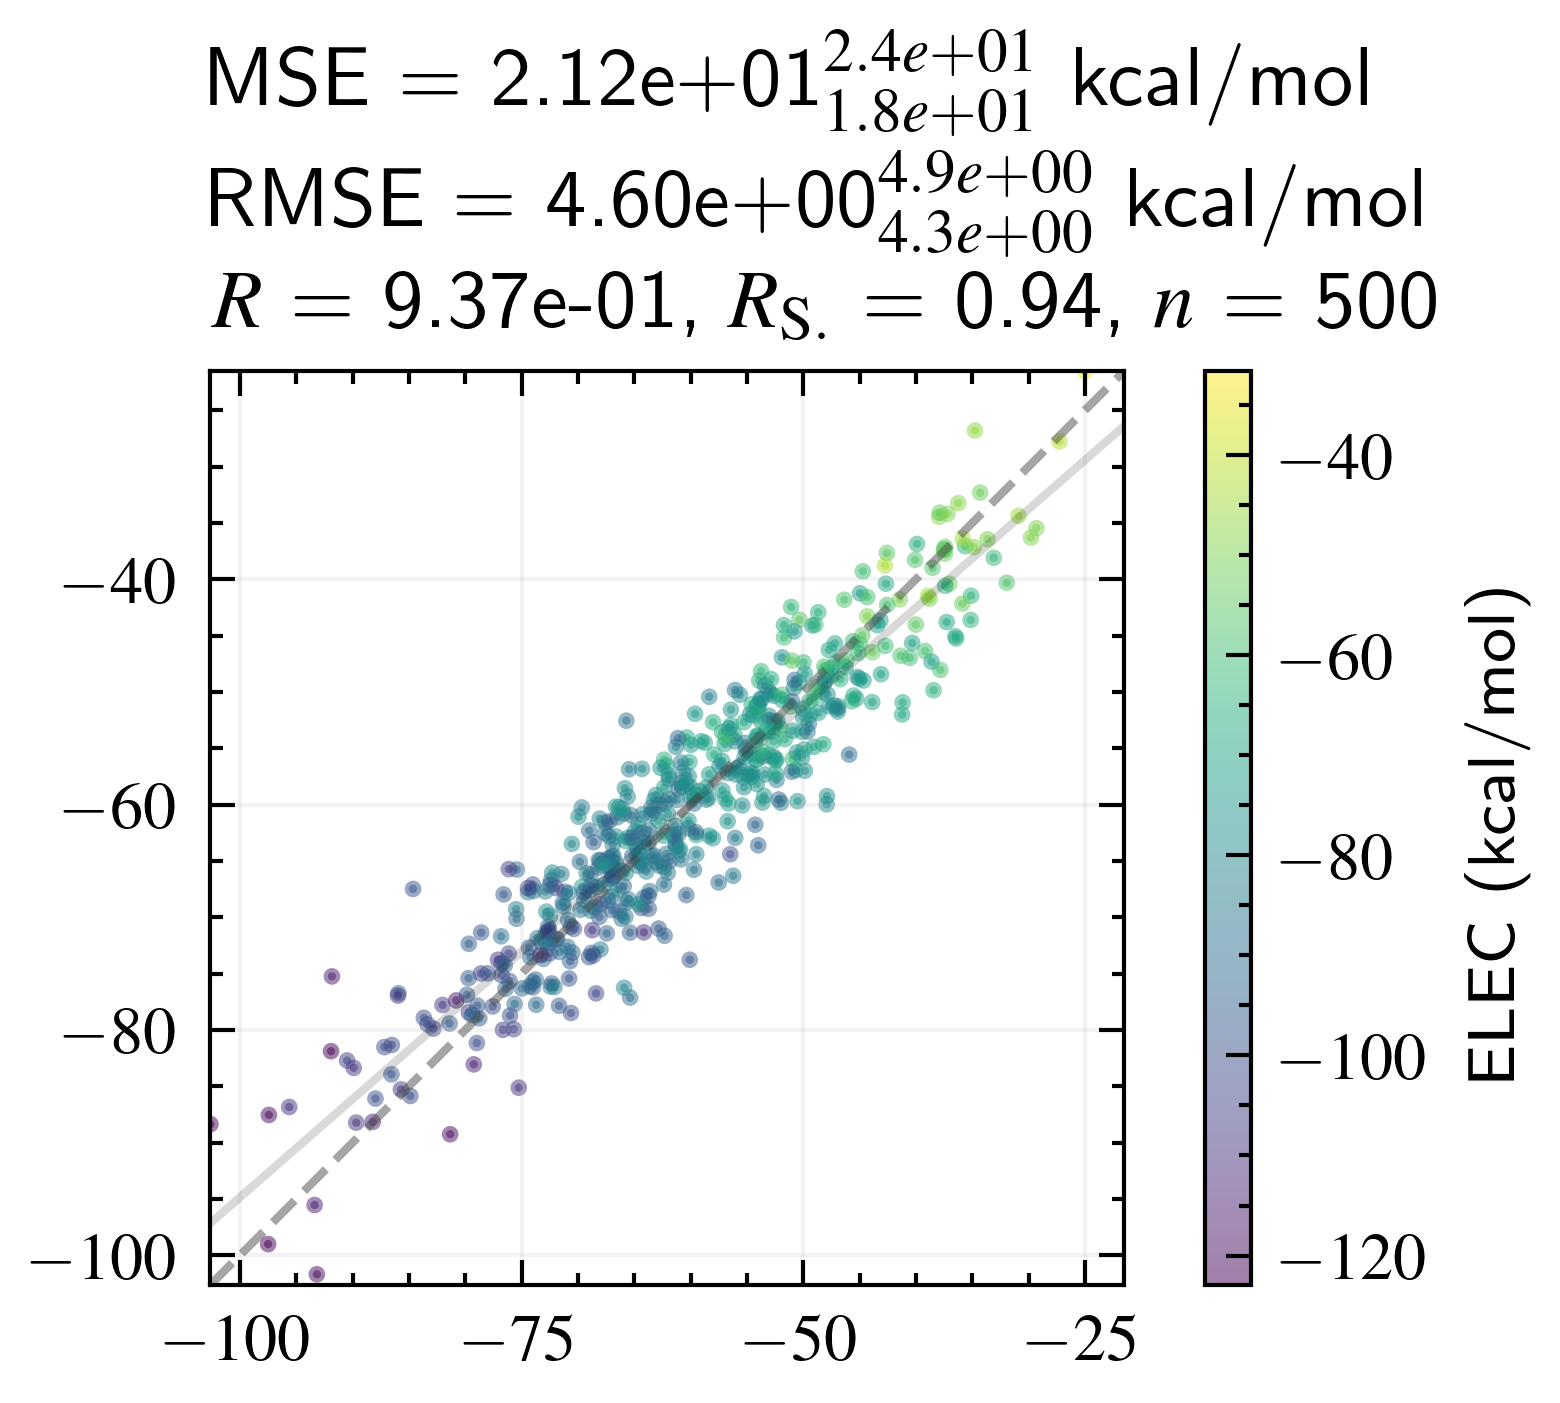

In [103]:
LJFF.data["fit_intE"] = LJFF.eval_jax(bestres) + LJFF.data.ECOL

plot_energy_MSE(LJFF.data, "intE", "fit_intE",  elec = "ELEC")
plt.savefig("ecol_exact_lj_fit.pdf")


#  LJ fit exact, ECOL fit


In [78]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
LJFF = next(read_from_pickle(f"ff/fit_ECOL_mdcm_intE.pkl"))
LJFF

FF: LJ water_cluster ELEC harmonic ECOL (jax_coloumb: True)

In [70]:
# p = PKL_PATH / "water_cluster/pbe0dz/pbe0_dz.pc"
# data_ = Data(p)

In [71]:
# data_.data

In [72]:
# data_.monomer_df

In [73]:
# LJFF.data

In [80]:
LJFF.elec = "fit_ECOL"
LJFF.intE = "intE"
LJFF.intern = "Exact"
LJFF.set_intE()
LJFF.set_targets()
print(LJFF.targets.mean())
LJFF

71.7089


FF: LJ water_cluster fit_ECOL Exact intE (jax_coloumb: True)

In [83]:
fit_repeat(LJFF, 
           10, 
           f"{ffpkl}_LJ",
           bounds = LJ_bound,
           loss="jax",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [84]:
pd.DataFrame(LJFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
8,116.756821,898,1548,0,True,Optimization terminated successfully.,"[0.28621197415397204, 2.499979885874981, 0.001...","([[0.28621197415397204, 2.499979885874981, 0.0..."
17,116.759087,565,983,0,True,Optimization terminated successfully.,"[0.2857752864896849, 2.4992560458603226, 0.001...","([[0.2857752864896849, 2.4992560458603226, 0.0..."
18,116.938583,666,1158,0,True,Optimization terminated successfully.,"[0.0010035715006301272, 2.5, 0.005612764687615...","([[0.0010035715006301272, 2.5, 0.0056127646876..."
20,117.017288,949,1624,0,True,Optimization terminated successfully.,"[0.0030966786917151516, 2.5, 0.001, 0.00394481...","([[0.0030966786917151516, 2.5, 0.001, 0.003944..."
7,117.019226,691,1162,0,True,Optimization terminated successfully.,"[0.001, 2.5, 0.001, 0.003945336792745869]","([[0.001, 2.5, 0.001, 0.003945336792745869], [..."
13,117.019257,521,889,0,True,Optimization terminated successfully.,"[0.001, 2.5, 0.001, 0.0039451090956125826]","([[0.001, 2.5, 0.001, 0.0039451090956125826], ..."
2,129.726898,322,569,0,True,Optimization terminated successfully.,"[0.3949978800906637, 1.9667594087585343, 0.005...","([[0.3949978800906637, 1.9667594087585343, 0.0..."
0,134.035934,111,281,0,True,Optimization terminated successfully.,"[1895.8678696937782, 1428.0571930052483, 425.0...","([[1895.8678696937782, 1428.0571930052483, 425..."
6,146.298889,352,656,0,True,Optimization terminated successfully.,"[0.0018859593917589393, 2.1486069144414737, 2....","([[0.0018859593917589393, 2.1486069144414737, ..."
9,165.882172,287,538,0,True,Optimization terminated successfully.,"[0.08191619427467431, 2.0511522933275304, 2.36...","([[0.08191619427467431, 2.0511522933275304, 2...."


In [85]:
bestres = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").x)[0]
bestres

array([2.86211974e-01, 2.49997989e+00, 1.00000000e-03, 3.77123641e-03])

In [86]:
abs(LJFF.eval_jax(bestres)).mean()

Array(71.44858, dtype=float32)

In [87]:
abs(LJFF.targets).mean()

Array(71.7089, dtype=float32)

In [88]:
best = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

10.805407011247237

8.053288236231463e-224


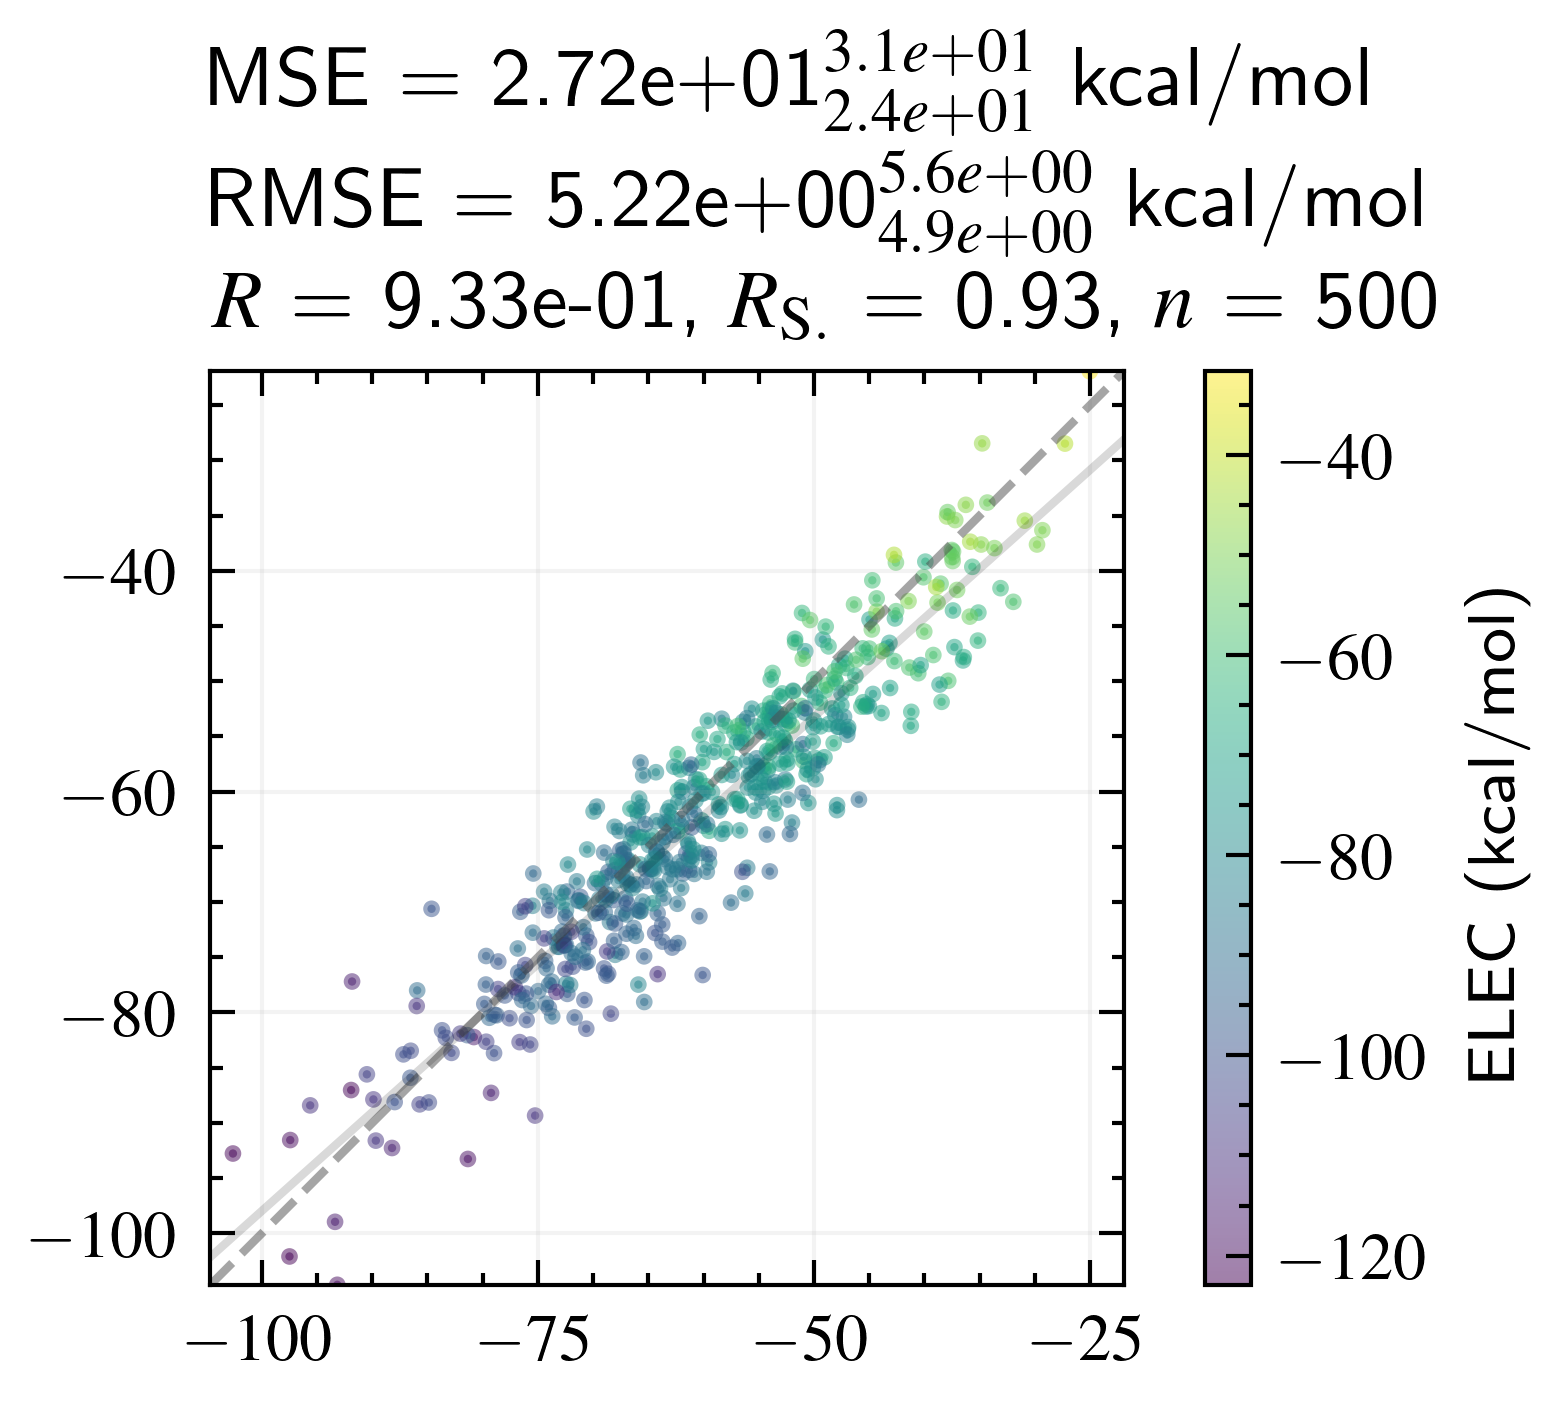

In [90]:
LJFF.data["fit_intE"] = LJFF.eval_jax(bestres) + LJFF.data.ECOL

plot_energy_MSE(LJFF.data, "intE", "fit_intE",  elec = "ELEC")
plt.savefig("ecol_exact_lj_fit_ecol_fit.pdf")


#  DE fit


In [23]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
DEFF = next(read_from_pickle(f"ff/fit_ECOL_mdcm_intE.pkl"))
DEFF.elec = "fit_ECOL"
DEFF.data.intE.abs().mean()

59.12803914354881

In [24]:
fit_repeat(DEFF, 
           10, 
           "test",
           bounds = DE_bound,
           loss="jax_de",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [30]:
pd.DataFrame(DEFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
7,11.775151,964,1559,0,True,Optimization terminated successfully.,"[0.3411363344649736, 1.2834539826299567, 2.5, ...","([[0.3411363344649736, 1.2834539826299567, 2.5..."
11,11.775182,596,1013,0,True,Optimization terminated successfully.,"[0.3410279489227199, 1.2835442577247882, 2.499...","([[0.3410279489227199, 1.2835442577247882, 2.4..."
6,11.775245,1476,2327,0,True,Optimization terminated successfully.,"[0.34114571204260147, 1.283410496813493, 2.499...","([[0.34114571204260147, 1.283410496813493, 2.4..."
20,11.775511,1283,2046,0,True,Optimization terminated successfully.,"[0.3406634610028251, 1.2834286543030644, 2.499...","([[0.3406634610028251, 1.2834286543030644, 2.4..."
9,11.776557,581,946,0,True,Optimization terminated successfully.,"[0.3407296851411241, 1.2837287936298885, 2.499...","([[0.3407296851411241, 1.2837287936298885, 2.4..."
17,11.777202,943,1549,0,True,Optimization terminated successfully.,"[0.34070603589209786, 1.2838674274856148, 2.49...","([[0.34070603589209786, 1.2838674274856148, 2...."
1,11.792897,1024,1623,0,True,Optimization terminated successfully.,"[0.3391777333651863, 1.2858844652607933, 2.499...","([[0.3391777333651863, 1.2858844652607933, 2.4..."
16,11.793501,729,1197,0,True,Optimization terminated successfully.,"[0.3392183785149385, 1.2858566511837575, 2.499...","([[0.3392183785149385, 1.2858566511837575, 2.4..."
8,11.793520,1672,2621,0,True,Optimization terminated successfully.,"[0.33895459035051223, 1.2859510668931469, 2.49...","([[0.33895459035051223, 1.2859510668931469, 2...."
18,14.313481,740,1191,0,True,Optimization terminated successfully.,"[0.4379737380241687, 1.1385457267294805, 2.5, ...","([[0.4379737380241687, 1.1385457267294805, 2.5..."


In [27]:
# np.sqrt(10.7)

In [28]:
best = list(pd.DataFrame(\
                  DEFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

3.4314940263311815

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


2.0136656937969305e-19


(<Axes: xlabel='NBOND energy\n(kcal/mol)', ylabel='CCSD(T) interaction energy\n(kcal/mol)'>,
 {'MSE': 1.2343012918828257e+76,
  'RMSE': 1.110991130424913e+38,
  'R': -0.38811610661346574,
  'RS': -0.3537352069408277,
  'n': 500,
  'slope': -9.093174018307893e+35,
  'intercept': inf})

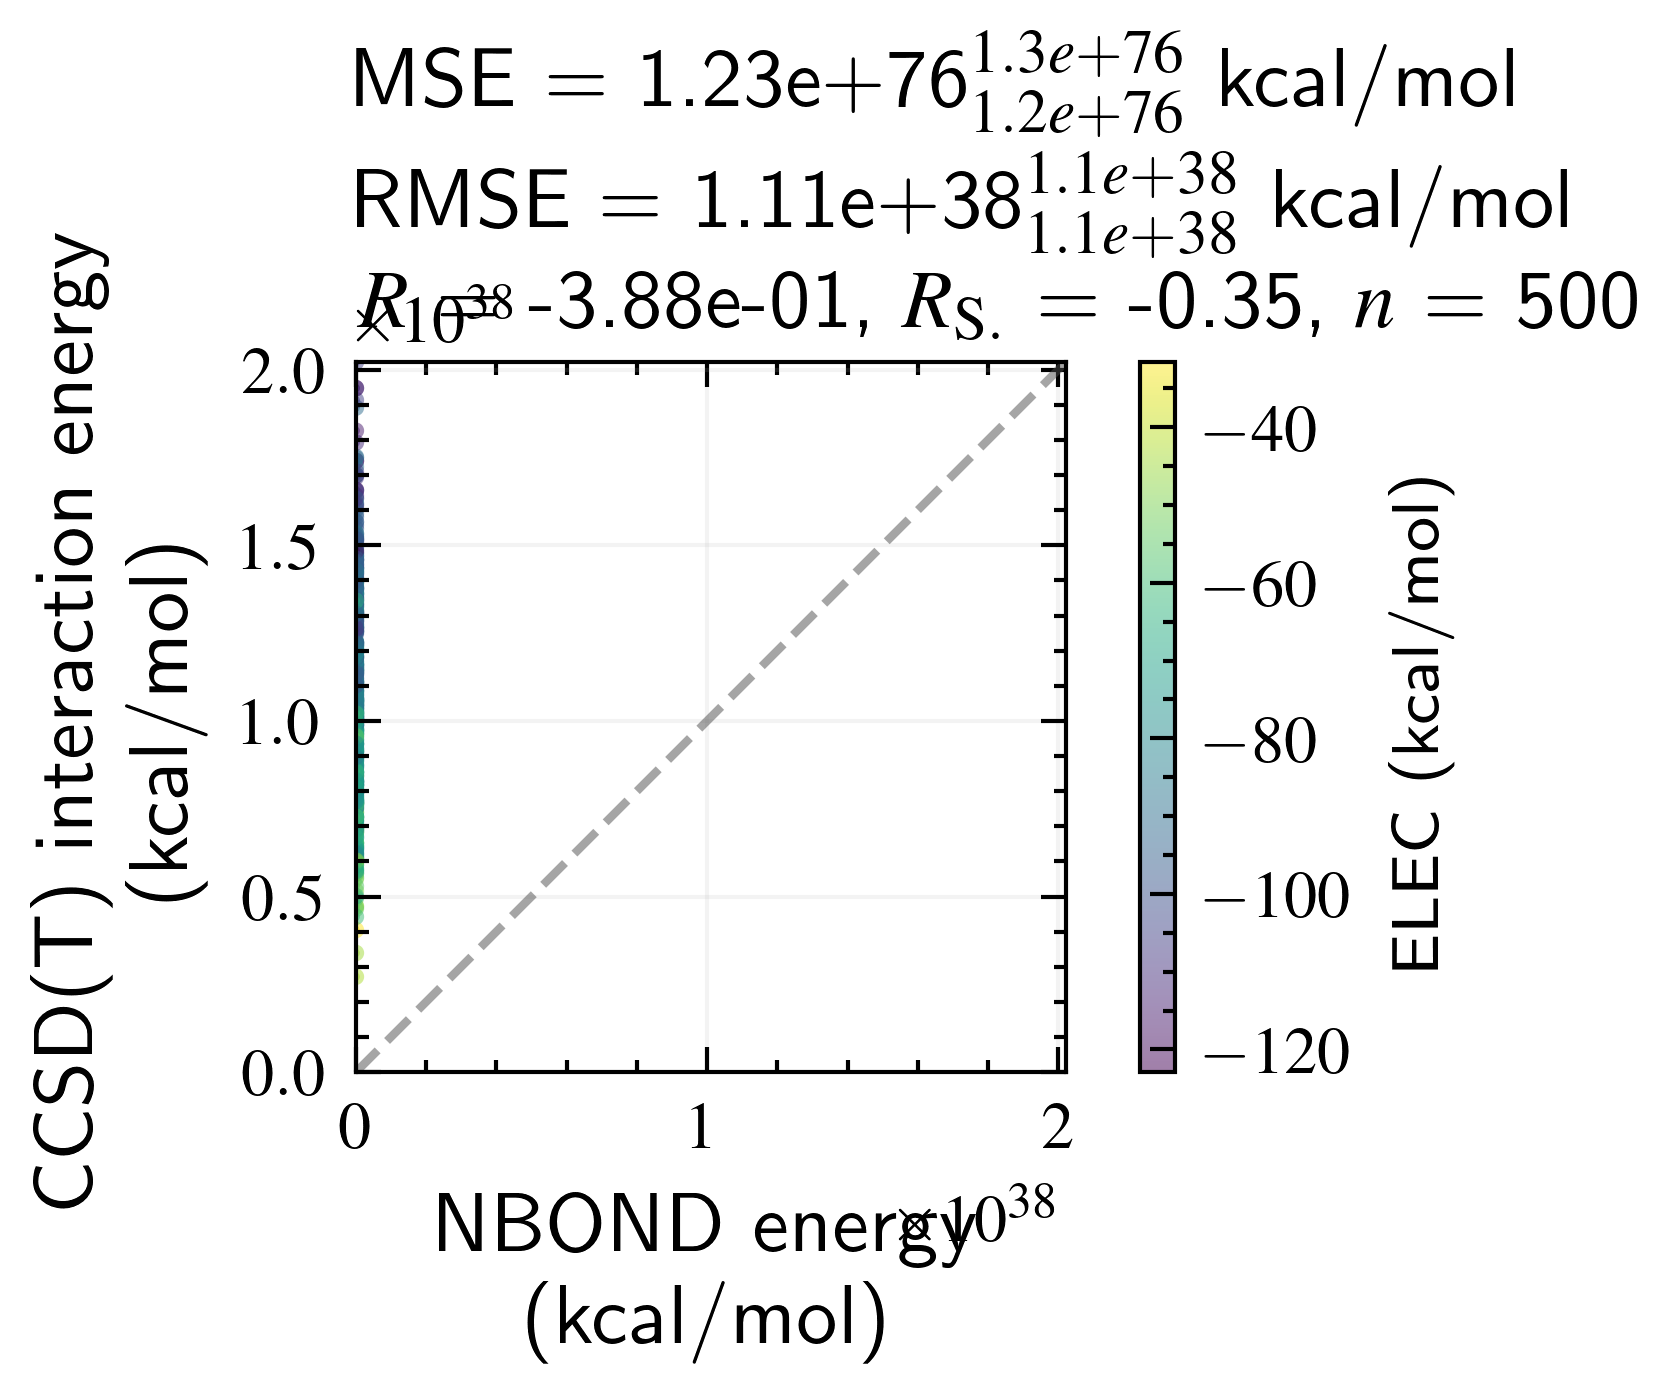

In [63]:
LJFF.data["fit_intE"] = LJFF.eval_jax(resx) + LJFF.data.ELEC

plot_energy_MSE(DEFF.data, "intE", "fit_intE",  elec = "ELEC")



In [27]:
resx = list(pd.DataFrame(\
                  DEFF.opt_results)\
     .sort_values("fun").x)[0]

(array([  7.,  27.,  43.,  79., 100., 111.,  64.,  50.,  13.,   6.]),
 array([-77.66558075, -72.58831787, -67.51104736, -62.43378067,
        -57.35651779, -52.2792511 , -47.20198441, -42.12471771,
        -37.04745102, -31.97018623, -26.89291954]),
 <BarContainer object of 10 artists>)

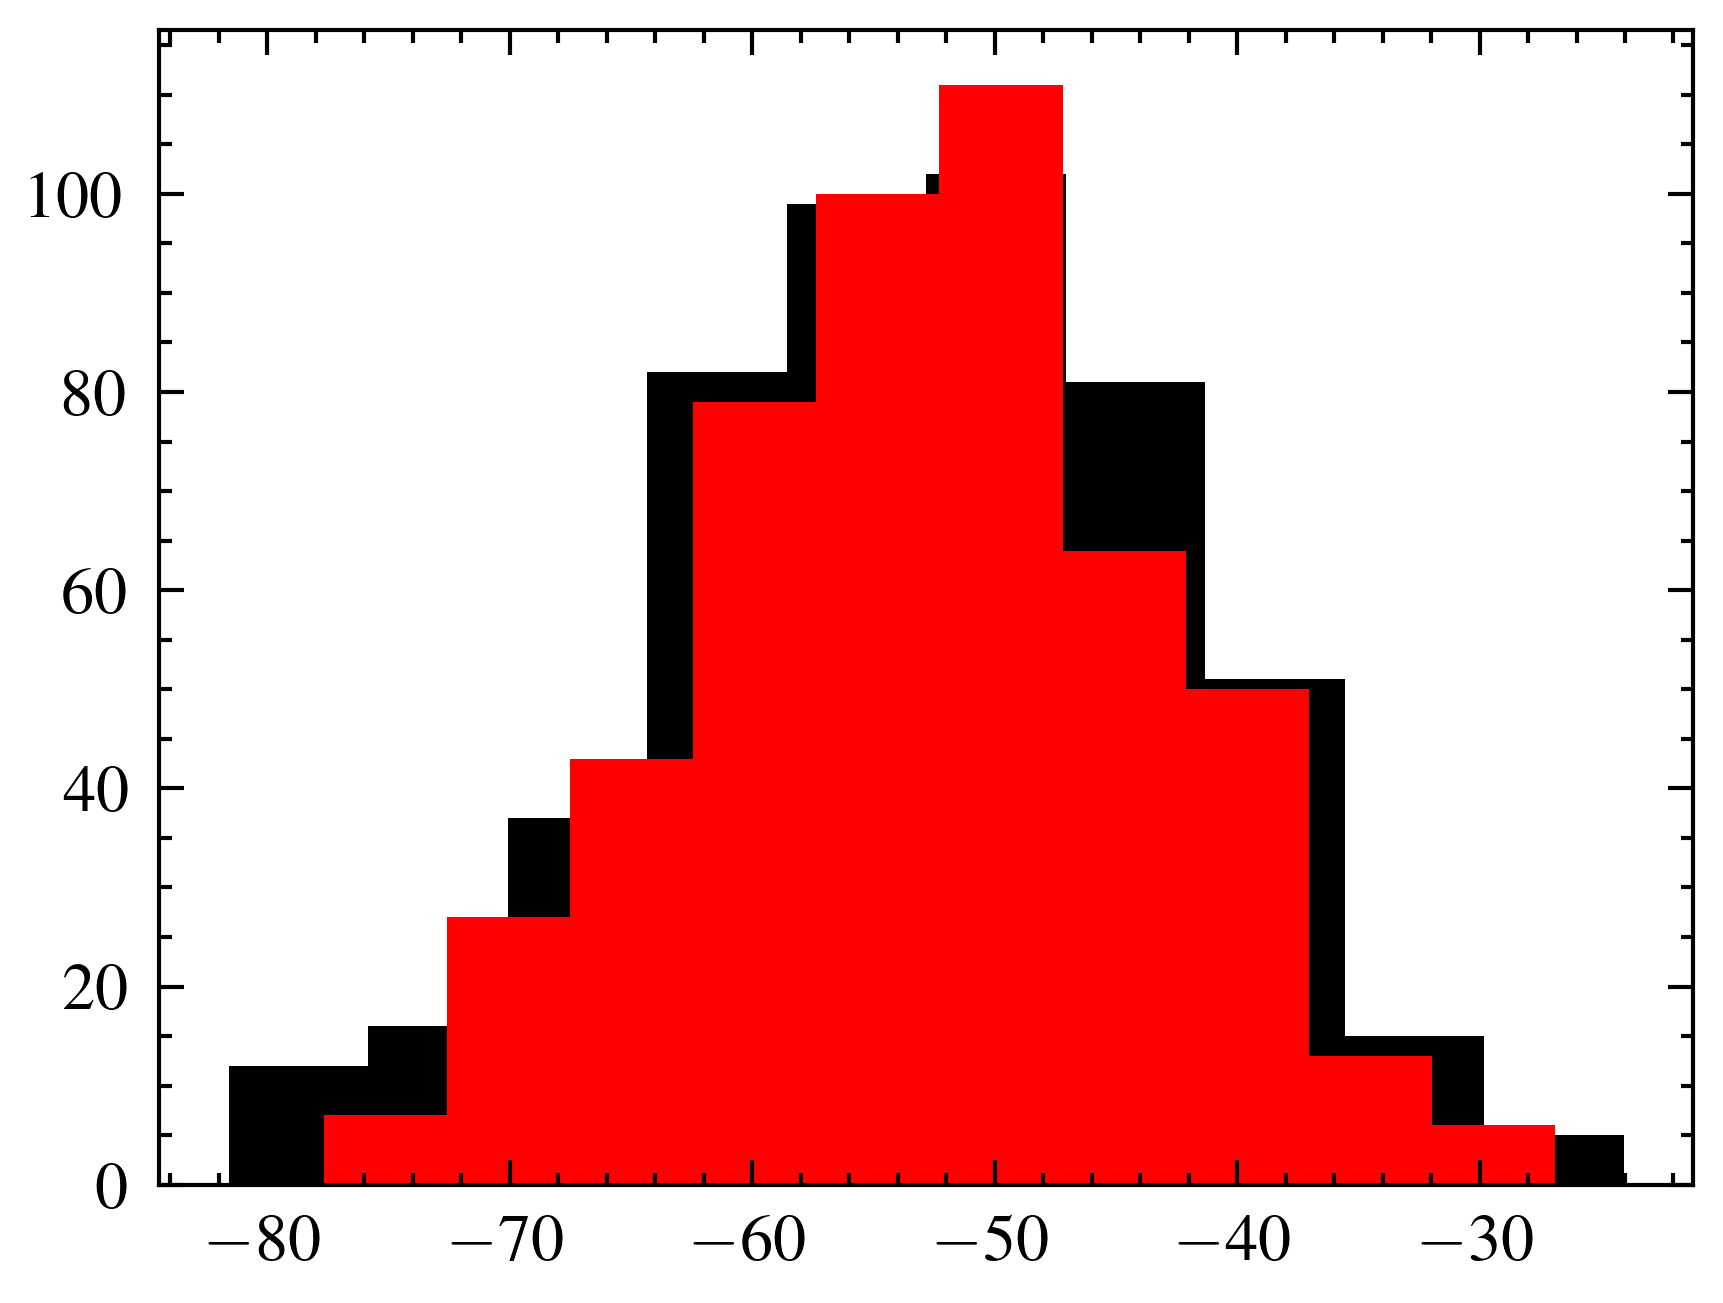

In [32]:
plt.hist(DEFF.targets)
plt.hist(DEFF.eval_jax_de(resx))

In [30]:
resx

array([ 0.34116161,  1.28335808,  2.5       ,  2.49999817,  7.37977031,
       19.28580408])

0.0


(<Axes: xlabel='NBOND energy\n(kcal/mol)', ylabel='CCSD(T) interaction energy\n(kcal/mol)'>,
 {'MSE': 11.775170940231728,
  'RMSE': 3.431496894976262,
  'R': 0.9907021031578068,
  'RS': 0.9895893343573374,
  'n': 500,
  'slope': 0.9575077841699374,
  'intercept': -5.660148647068695})

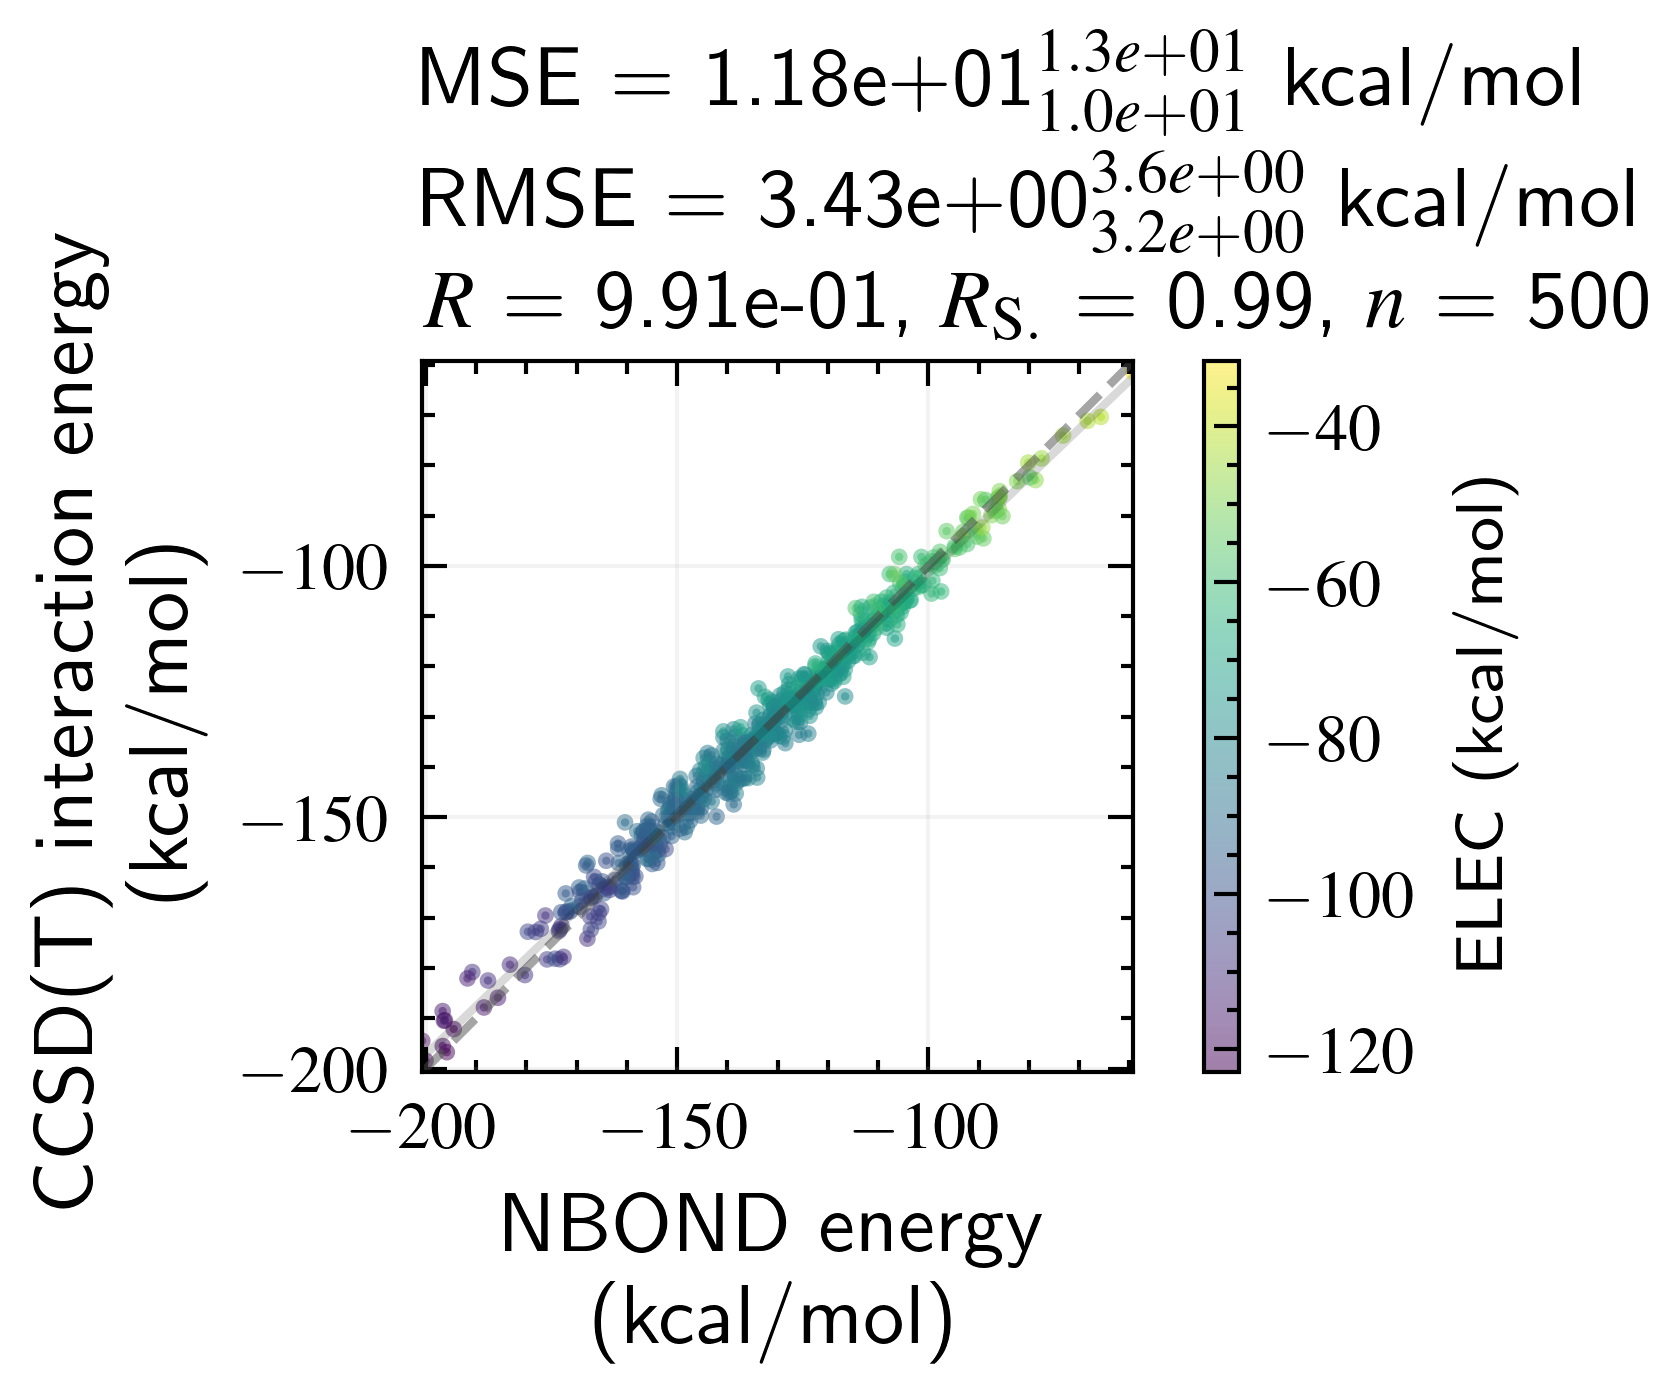

In [31]:
DEFF.data["fit_ECOL_"] = DEFF.eval_jax_de(resx) + _c.data.ELEC

plot_energy_MSE(DEFF.data, "ECOL", "fit_ECOL_",  elec = "ELEC")

